In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import pyplot
import numpy
%matplotlib inline

In [4]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2/float(nx-1)
dy = 2/float(ny-1)
sigma = .0009
nu = 0.01
dt = sigma*dx*dy/float(nu)


x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny,nx))
un = numpy.ones((ny,nx)) ##
vn = numpy.ones((ny,nx))
comb = numpy.ones((ny,nx))

In [5]:
###Assign initial conditions

u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


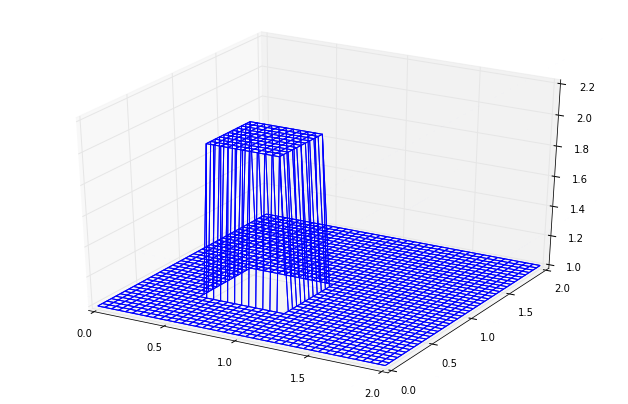

In [6]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u[:], cmap=cm.coolwarm)
wire2 = ax.plot_wireframe(X,Y,v[:], cmap=cm.coolwarm)

In [7]:
for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1,1:-1] = un[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])-dt/dy*vn[1:-1,1:-1]* \
                   (un[1:-1,1:-1]-un[0:-2,1:-1])+nu*dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+ \
                   nu*dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])
    
    v[1:-1,1:-1] = vn[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-dt/dy*vn[1:-1,1:-1]* \
                   (vn[1:-1,1:-1]-vn[0:-2,1:-1])+nu*dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+ \
                   nu*dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])
     
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1

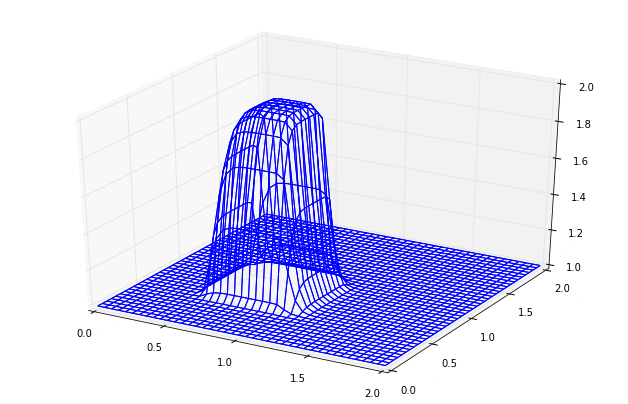

In [8]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u)
wire2 = ax.plot_wireframe(X,Y,v)